In [1]:
# Import library
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghubungkan Koneksi Database
dbfile = 'olist.db'
con = sqlite3.connect(dbfile)
cur = con.cursor()

# Mengeksekusi Database di table list
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(table_list)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


In [2]:
# Warning
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
# Menampilkan Tabel Customer
df_customer = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)
df_customer.set_index("index", inplace=True)
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
index,,,,,
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# 1. Tabel Order
df_order = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
df_order.set_index("index", inplace=True)
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# 2. Tabel Item
df_items = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', con)
df_items.set_index("index", inplace=True)
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
index,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# 3. Tabel Produk
df_products = pd.read_sql_query('SELECT * FROM olist_products_dataset', con)
df_products.set_index("index", inplace=True)
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
index,,,,,,,,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
# 4. Tabel Translation
df_translation = pd.read_sql_query('SELECT * FROM product_category_name_translation', con)
df_translation.set_index("index", inplace=True)
df_translation.head()

,product_category_name,product_category_name_english
index,,
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
# OBJEKTIF 1

In [18]:
# Mengecek null_Tabel Item
df_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
# Mengecek duplicate_Tabel Item
df_items[df_items.duplicated(keep=False)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
index,,,,,,,


In [20]:
# Mengecek nul_Tabel Produk
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [21]:
# Mengecek duplikat_Tabel Produk
df_products[df_products.duplicated(keep=False)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
index,,,,,,,,,


In [22]:
# Mengecek null_Tabel Translation
df_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [23]:
# Mengecek duplikat_Tabel Translation
df_translation[df_translation.duplicated(keep=False)]

,product_category_name,product_category_name_english
index,,


In [24]:
# Mengeceke Inkonsistensi data product_category_Tabel Translation
df_translation["product_category_name_english"].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [25]:
# Merevisi Inkonsistensi
ganti = {"home_confort": "home_comfort", "home_comfort_2": "home_comfort", "home_appliances_2":"home_appliances"}
df_translation = df_translation.replace(ganti)

df_translation["product_category_name_english"].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_comfort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [26]:
# Menggabungkan Tabel Item, Tabel Produk, Tabel Translation
df1 = pd.merge(df_items, df_products, on="product_id", how="left")
df1 = pd.merge(df1, df_translation, on="product_category_name", how="left")
df1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [27]:
# Mengecek null_Tabel Gabungan
df1.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1627
dtype: int64

In [28]:
# Mengecek nama Non English
df1[["product_category_name","product_category_name_english"]].loc[(df1["product_category_name"].notna()) & (df1["product_category_name_english"].isna())]

,product_category_name,product_category_name_english
3228,portateis_cozinha_e_preparadores_de_alimentos,NaN
12976,pc_gamer,NaN
12977,pc_gamer,NaN
13025,portateis_cozinha_e_preparadores_de_alimentos,NaN
18629,pc_gamer,NaN
19702,portateis_cozinha_e_preparadores_de_alimentos,NaN
31806,pc_gamer,NaN
32887,pc_gamer,NaN
36976,portateis_cozinha_e_preparadores_de_alimentos,NaN
37083,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [29]:
# Mengganti nama Non English dengan English
isi = {"pc_gamer":"pc_gamer", "portateis_cozinha_e_preparadores_de_alimentos":"kitchen_and_food_preparators_portables", None:"others"}
df1["product_category_name_english"] = df1["product_category_name_english"].fillna(df1["product_category_name"].map(isi))

df1.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english       0
dtype: int64

In [30]:
# Merangkum Penjualan per Kategori Produk
df1_summary = df1.rename({"product_category_name_english":"product_category", "price":"sales"}, axis=1)
df1_summary = df1_summary[["product_category","sales"]].groupby("product_category").sum().sort_values("sales", ascending=False).reset_index()
df1_summary

,product_category,sales
0,health_beauty,1258681.34
1,watches_gifts,1205005.68
2,bed_bath_table,1036988.68
3,sports_leisure,988048.97
4,computers_accessories,911954.32
...,...,...
67,pc_gamer,1545.95
68,flowers,1110.04
69,cds_dvds_musicals,730.00
70,fashion_childrens_clothes,569.85


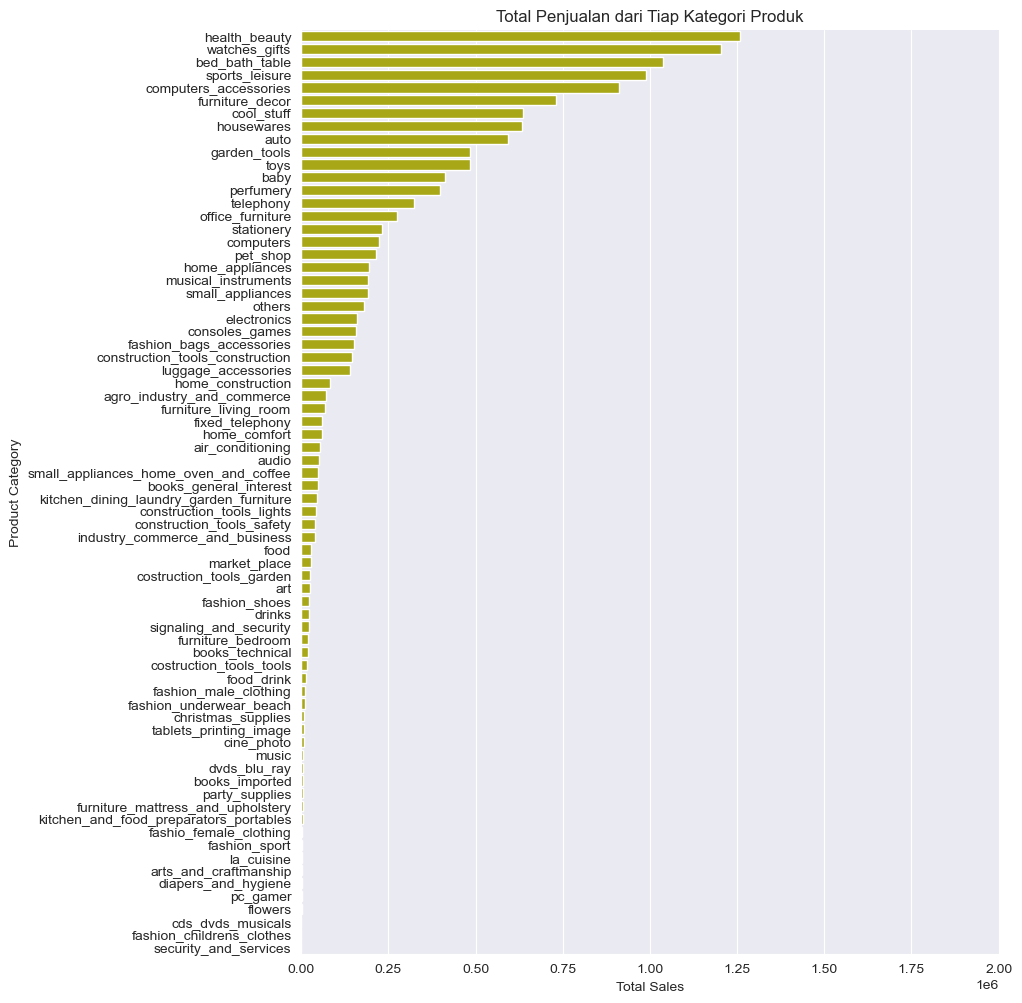

In [32]:
#1 Visualisasi
f, ax = plt.subplots(figsize=(9, 12))

sns.barplot(x="sales", y="product_category", data=df1_summary, color="y")
sns.set_style("darkgrid")

ax.set(xlim=(0, 2_000_000), ylabel="Product Category", xlabel="Total Sales", title="Total Penjualan dari Tiap Kategori Produk")

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

In [33]:
# OBJEKTIF 2

In [34]:
# Meringkas Data df1
df2 = df1.rename({"product_category_name_english":"product_category", "order_id":"order_counts"}, axis=1)
df2 = df2[["product_category","order_counts"]].groupby("product_category").count()
df2 = df2.sort_values("order_counts", ascending=False).reset_index()

df2

,product_category,order_counts
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
67,cds_dvds_musicals,14
68,la_cuisine,14
69,pc_gamer,9
70,fashion_childrens_clothes,8


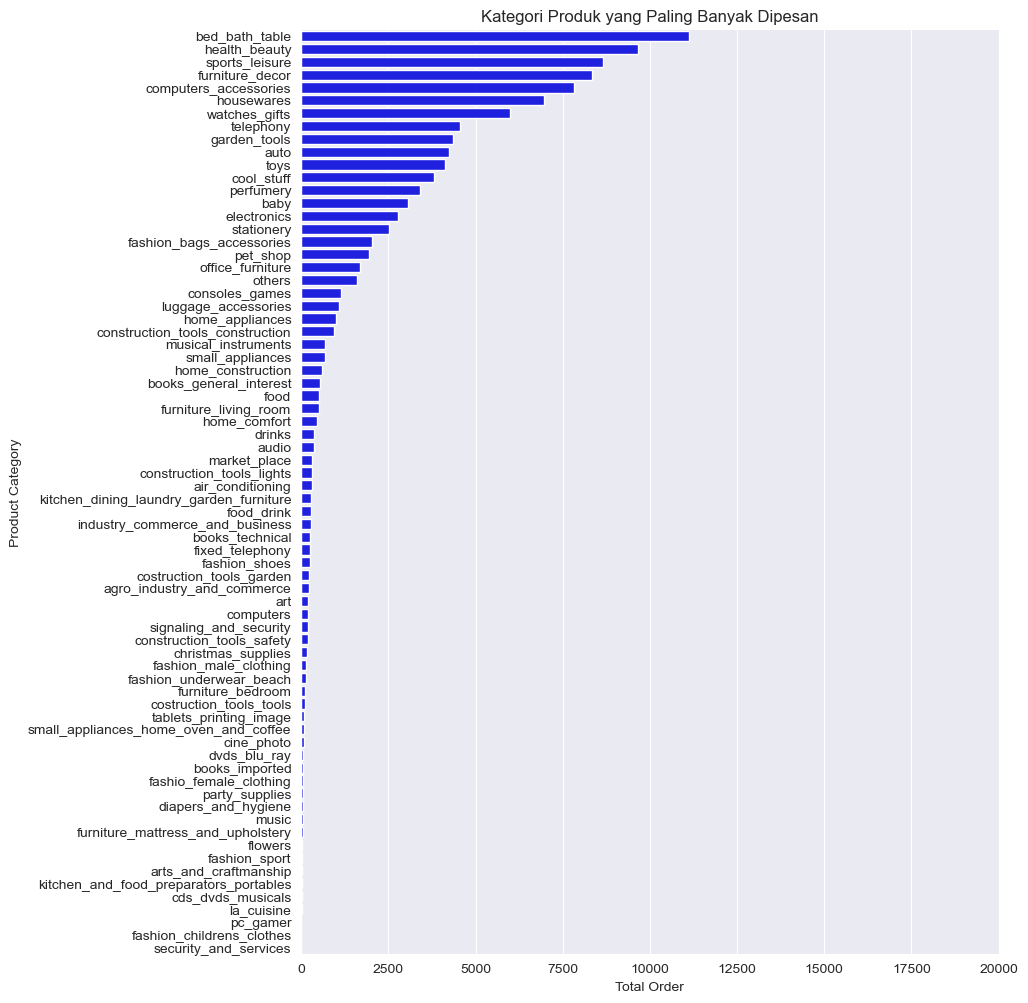

In [35]:
#2 Visualisasi
f, ax = plt.subplots(figsize=(9, 12))

sns.barplot(y="product_category", x="order_counts", data=df2, color="b")
sns.set_style("whitegrid")

ax.set(xlim=(0, 20_000), ylabel="Product Category", xlabel="Total Order", title="Kategori Produk yang Paling Banyak Dipesan")

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

In [36]:
# Mengecek nul_Tabel Order
df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [37]:
# Mengecek Duplikat Tabel Order
df_order[df_order.duplicated(keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,


In [38]:
# Menyederhanakan Tabel Order
df_order = df_order.drop(columns=["customer_id","order_status","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"])
df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"], yearfirst=True)
df_order["month_purchased"] = df_order["order_purchase_timestamp"].dt.month
df_order["year_purchased"] = df_order["order_purchase_timestamp"].dt.year
df_order = df_order.loc[df_order["year_purchased"] == 2018]
df_order

,order_id,order_purchase_timestamp,month_purchased,year_purchased
index,,,,
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,8,2018
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2,2018
12,82566a660a982b15fb86e904c8d32918,2018-06-07 10:06:19,6,2018
13,5ff96c15d0b717ac6ad1f3d77225a350,2018-07-25 17:44:10,7,2018
...,...,...,...,...
99428,c22a47117b6a87c967b0c278488110c1,2018-06-22 20:53:29,6,2018
99430,c81f74e50f0496fa39716cc77cacd460,2018-03-04 22:48:38,3,2018
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2,2018


In [40]:
# Menggabungkan Tabel Order dengan Tabel df1
df3 = pd.merge(df1, df_order, on="order_id", how="inner")

# Top 10 Sales
df2_top10 = df2.head(10)
df3 = df3.rename({"product_category_name_english":"product_category"}, axis=1).reset_index()
df3 = pd.merge(df2_top10[["product_category"]], df3[["product_category", "order_item_id", "month_purchased"]], on="product_category", how="left")
df3

,product_category,order_item_id,month_purchased
0,bed_bath_table,1,7
1,bed_bath_table,1,3
2,bed_bath_table,1,1
3,bed_bath_table,1,3
4,bed_bath_table,1,2
...,...,...,...
39766,auto,1,4
39767,auto,1,4
39768,auto,2,7
39769,auto,3,7


In [41]:
# Membuat Pivot Tabel
df3 = pd.pivot_table(df3.reset_index(), columns="product_category", index="month_purchased", values="order_item_id", aggfunc="sum")
df3

product_category,auto,bed_bath_table,computers_accessories,furniture_decor,garden_tools,health_beauty,housewares,sports_leisure,telephony,watches_gifts
month_purchased,,,,,,,,,,
1,299,1097,884,848,295,713,427,754,398,462
2,335,814,1422,569,402,763,503,730,463,370
3,367,989,976,874,375,738,542,890,369,449
4,382,963,632,815,383,807,553,693,395,550
5,325,952,563,821,398,888,892,542,274,700
6,342,946,490,526,257,1011,846,492,250,539
7,364,781,490,607,229,894,813,553,250,546
8,428,805,473,600,167,964,739,524,348,447


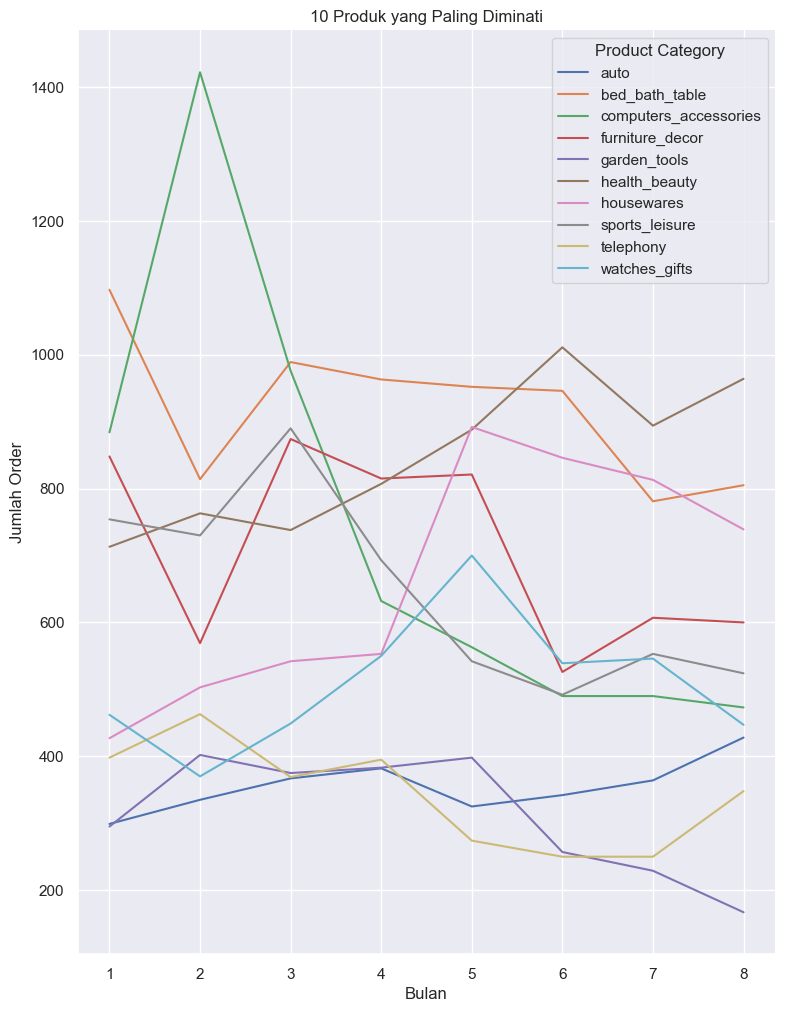

In [42]:
#3 Visualisasi
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(9,12)})
ax = df3.plot(kind="line", title="10 Produk yang Paling Diminati", xlabel="Bulan", ylabel="Jumlah Order", figsize=(9,12))

ax.legend(title="Product Category")

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)